✅ Model file found. Loading model...
✅ Model loaded successfully.
🖼️ Image loaded successfully.
🔍 Running prediction...


c:\Users\nithi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


✅ Prediction complete: Dog (62.04%)
✅ Labeled image saved as: labeled_output.jpg


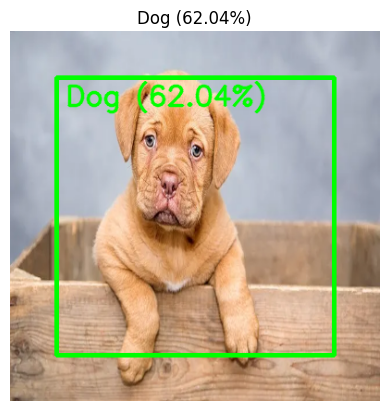

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(True)

cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

model_path = "cnn_cifar10.h5"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file '{model_path}' not found!")

print("✅ Model file found. Loading model...")
model = tf.keras.models.load_model(model_path, compile=False)
model.compile()
print("✅ Model loaded successfully.")

def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file '{image_path}' not found!")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error loading image. Check file format and path.")

    print("🖼️ Image loaded successfully.")

    original_image = cv2.resize(image, (400, 400))  
    processed_image = cv2.resize(image, (32, 32))  
    processed_image = processed_image / 255.0 
    processed_image = np.expand_dims(processed_image, axis=0) 
    return processed_image, original_image

image_path = r"C:\Users\nithi\img_recognition_app\image.webp"

image, original_image = preprocess_image(image_path)

print("🔍 Running prediction...")
predictions = model.predict(image, verbose=0)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions) * 100  
predicted_label = f"{cifar10_labels[predicted_class]} ({confidence:.2f}%)"
print(f"✅ Prediction complete: {predicted_label}")

h, w, _ = original_image.shape
cv2.rectangle(original_image, (50, 50), (w - 50, h - 50), (0, 255, 0), 3) 
cv2.putText(original_image, predicted_label, (60, 80), cv2.FONT_HERSHEY_SIMPLEX, 
            1, (0, 255, 0), 2, cv2.LINE_AA)

output_path = "labeled_output.jpg"
cv2.imwrite(output_path, original_image)
print(f"✅ Labeled image saved as: {output_path}")

original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image_rgb)
plt.axis("off")  
plt.title(predicted_label)
plt.show()